Installing requirements

In [57]:
!pip install --upgrade tensorflow


Import dependencies

In [58]:
# importing math & data processing libs
import pandas as pd
import numpy as np

# importing utils
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing drawing tools
import matplotlib.pyplot as plt

# importing NN wrapper lib
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

Load the data

In [59]:
dataset = pd.read_csv("Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [60]:
x_data = dataset[["TV", "Radio", "Newspaper"]]
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")


x_data MEAN:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64

x_data STD:
TV           85.854236
Radio        14.846809
Newspaper    21.778621
dtype: float64


In [61]:
x_data = dataset[["TV", "Radio", "Newspaper"]]

x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")


x_data MEAN:
TV           1.221245e-16
Radio       -4.440892e-16
Newspaper    2.309264e-16
dtype: float64

x_data STD:
TV           1.0
Radio        1.0
Newspaper    1.0
dtype: float64


In [62]:
x_data

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [64]:
def categorize_sales(sales):
    if sales < 10:
        return "Low"
    elif sales < 15:
        return "Medium"
    else:
        return "High"

dataset["sales_category"] = dataset["Sales"].apply(categorize_sales)

# Кодуємо категорії у числа
class_mapping = {"Low": 0, "Medium": 1, "High": 2}
dataset["class_num"] = [class_mapping[val_] for val_ in dataset["sales_category"]]

# One-hot encoding
y = to_categorical(dataset["class_num"], 3)


In [65]:
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

Train try #1

In [67]:
model = Sequential([
    Input(shape=(3,)),  # 3 ознаки у вхідних даних
    Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", "f1_score"]
)

In [70]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5494 - f1_score: 0.4253 - loss: 1.0119 - val_accuracy: 0.5750 - val_f1_score: 0.5799 - val_loss: 0.8636
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5814 - f1_score: 0.5365 - loss: 0.9087 - val_accuracy: 0.6750 - val_f1_score: 0.6782 - val_loss: 0.7913
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - f1_score: 0.3268 - loss: 0.8320 - val_accuracy: 0.7000 - val_f1_score: 0.6984 - val_loss: 0.7303
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6267 - f1_score: 0.5021 - loss: 0.8089 - val_accuracy: 0.7250 - val_f1_score: 0.7234 - val_loss: 0.6798
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - f1_score: 0.4401 - loss: 0.7399 - val_accuracy: 0.7750 - val_f1_score: 0.7712 - val_loss: 0.6387
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - f1_score: 0.5304 - loss: 0.6805 - val_accuracy: 0.8500 - val_f1_score: 0.8457 - val_loss: 0.60

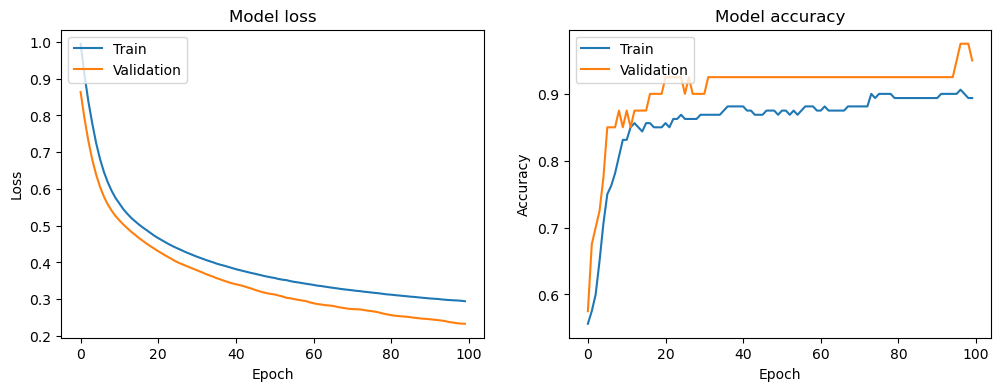

In [71]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


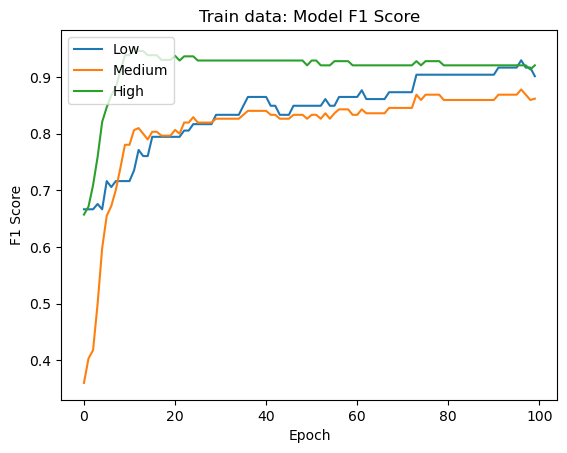

In [72]:
plt.plot([float(x[0]) for x in history['f1_score']])
plt.plot([float(x[1]) for x in history['f1_score']])
plt.plot([float(x[2]) for x in history['f1_score']])
plt.title('Train data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(["Low", "Medium", "High"], loc='upper left')
plt.show()


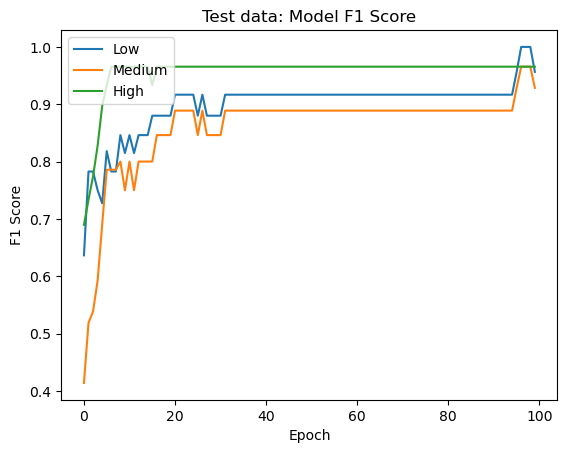

In [73]:
plt.plot([float(x[0]) for x in history['val_f1_score']])
plt.plot([float(x[1]) for x in history['val_f1_score']])
plt.plot([float(x[2]) for x in history['val_f1_score']])
plt.title('Test data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(["Low", "Medium", "High"], loc='upper left')
plt.show()


Try 2

In [79]:
model = Sequential([
    Input(shape=(3, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
initial_lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [82]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3034 - loss: 1.6213 - val_accuracy: 0.5500 - val_loss: 1.1128
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.9009 - val_accuracy: 0.7500 - val_loss: 0.6470
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.5673 - val_accuracy: 0.8250 - val_loss: 0.4471
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.4708 - val_accuracy: 0.9000 - val_loss: 0.3932
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3958 - val_accuracy: 0.9000 - val_loss: 0.3628
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.3793 - val_accuracy: 0.9000 - val_loss: 0.3271
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9039 - loss: 0.3269 - val_accuracy: 0.9500 - val_loss: 0.2957
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.3425 - val_accuracy: 0.9250 - val_loss: 0.2758

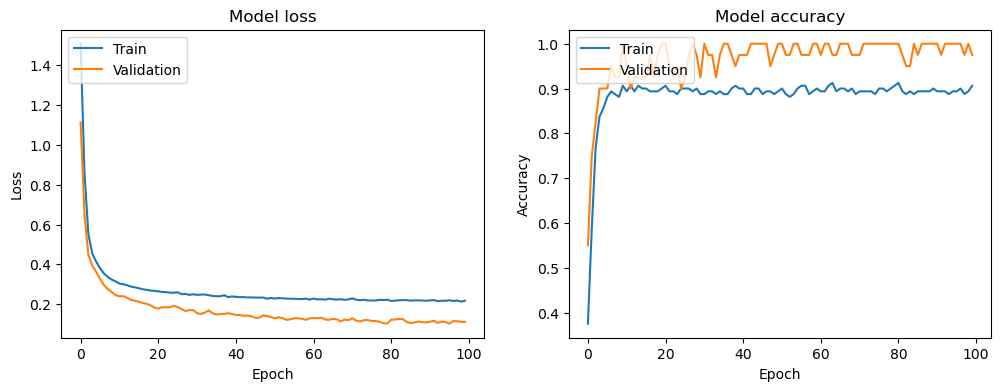

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Try 2

In [85]:
model = Sequential([
    Input(shape=(3, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
initial_lr = 0.3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [87]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4005 - loss: 1.0630 - val_accuracy: 0.8000 - val_loss: 0.4253
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8505 - loss: 0.4376 - val_accuracy: 0.8500 - val_loss: 0.3482
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.3626 - val_accuracy: 0.9500 - val_loss: 0.2386
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3158 - val_accuracy: 0.9750 - val_loss: 0.2066
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.3053 - val_accuracy: 0.8500 - val_loss: 0.2532
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9178 - loss: 0.2419 - val_accuracy: 0.9750 - val_loss: 0.1868
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - loss: 0.2555 - val_accuracy: 0.9500 - val_loss: 0.1813
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2685 - val_accuracy: 0.8750 - val_loss: 0.1817

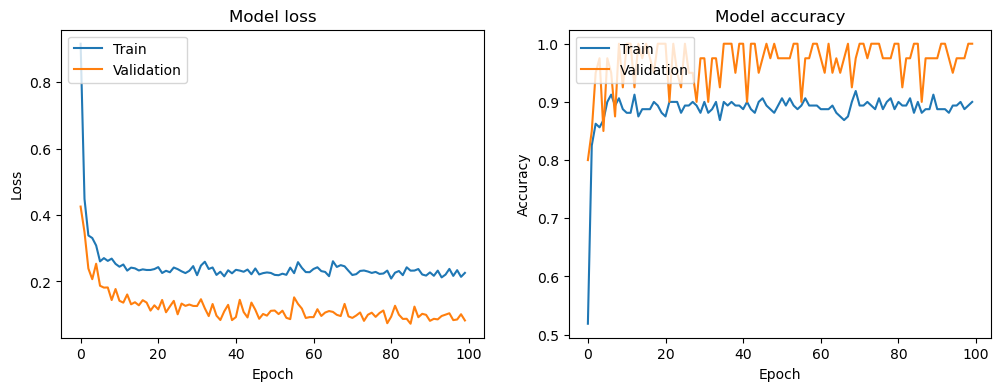

In [88]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Try 4

In [89]:
model = Sequential([
    Input(shape=(3, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [92]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3105 - loss: 1.5043 - val_accuracy: 0.3000 - val_loss: 1.5625
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 1.4402 - val_accuracy: 0.3000 - val_loss: 1.5477
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3287 - loss: 1.4374 - val_accuracy: 0.3250 - val_loss: 1.5330
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.4185 - val_accuracy: 0.3000 - val_loss: 1.5181
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3158 - loss: 1.4748 - val_accuracy: 0.3000 - val_loss: 1.5038
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 1.4859 - val_accuracy: 0.3000 - val_loss: 1.4895
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3142 - loss: 1.4670 - val_accuracy: 0.3000 - val_loss: 1.4753
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.4058 - val_accuracy: 0.3000 - val_loss: 1.4613


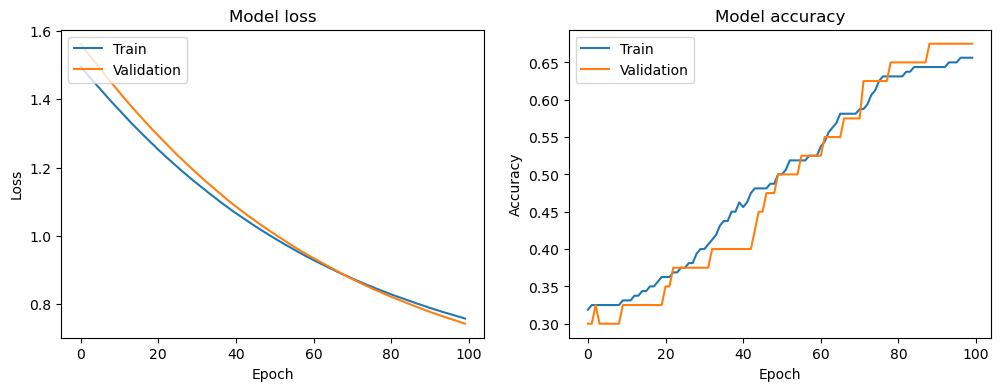

In [93]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Try 5

In [94]:
model = Sequential([
    Input(shape=(3, )),
    Dense(1, activation='relu'),
    Dense(3, activation='softmax')
])


In [95]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [96]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2974 - loss: 1.1166 - val_accuracy: 0.3500 - val_loss: 1.0932
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4115 - loss: 1.0961 - val_accuracy: 0.3750 - val_loss: 1.0815
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5110 - loss: 1.0760 - val_accuracy: 0.4000 - val_loss: 1.0756
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5207 - loss: 1.0555 - val_accuracy: 0.3500 - val_loss: 1.0721
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4840 - loss: 1.0605 - val_accuracy: 0.3500 - val_loss: 1.0699
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 1.0451 - val_accuracy: 0.3500 - val_loss: 1.0673
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4591 - loss: 1.0412 - val_accuracy: 0.3500 - val_loss: 1.0640
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 1.0471 - val_accuracy: 0.4000 - val_loss: 1.059

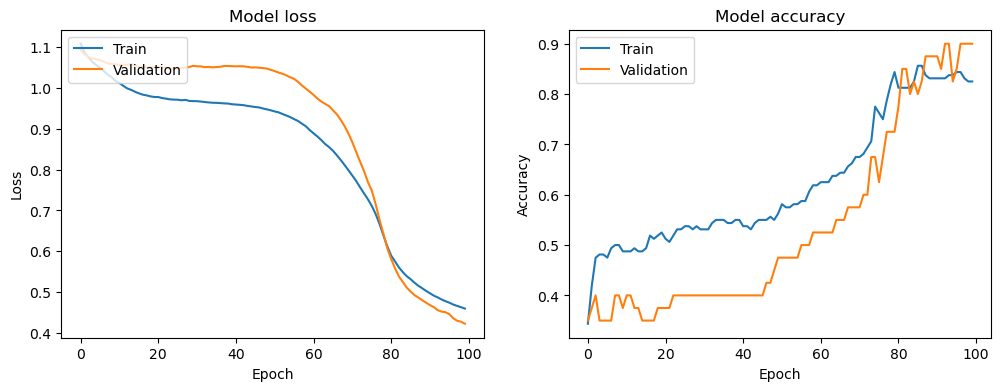

In [97]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Try 6

In [98]:
model = Sequential([
    Input(shape=(3, )),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [100]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3836 - loss: 1.0605 - val_accuracy: 0.5250 - val_loss: 0.9700
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5967 - loss: 0.8858 - val_accuracy: 0.6250 - val_loss: 0.8246
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - loss: 0.7394 - val_accuracy: 0.6500 - val_loss: 0.7293
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 0.6705 - val_accuracy: 0.7000 - val_loss: 0.6522
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7090 - loss: 0.6009 - val_accuracy: 0.7750 - val_loss: 0.5889
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.5609 - val_accuracy: 0.7750 - val_loss: 0.5303
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.4861 - val_accuracy: 0.7750 - val_loss: 0.4880
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.4450 - val_accuracy: 0.7750 - val_loss: 0.4500

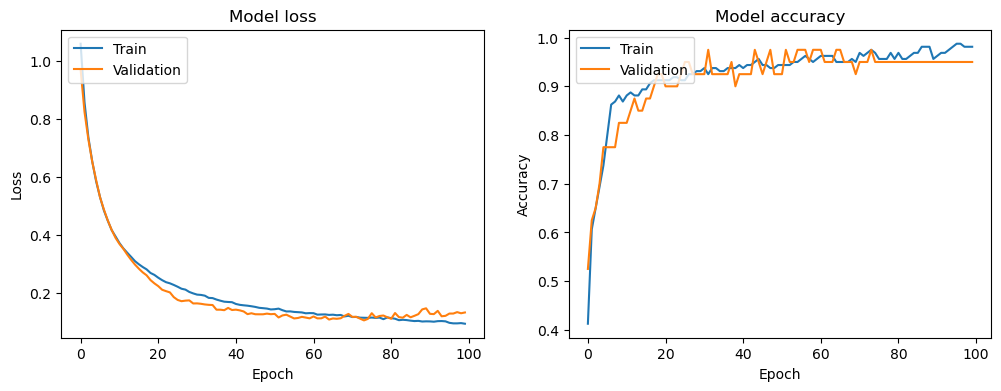

In [101]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Try 7

In [103]:
model = Sequential([
    Input(shape=(3, )),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,003 (121.11 KB)

 Trainable params: 31,003 (121.11 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [105]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5470 - loss: 0.8944 - val_accuracy: 0.8000 - val_loss: 0.4589
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.5311 - val_accuracy: 0.8500 - val_loss: 0.2689
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3994 - val_accuracy: 0.8500 - val_loss: 0.3373
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8400 - loss: 0.3350 - val_accuracy: 0.8500 - val_loss: 0.3024
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.2573 - val_accuracy: 0.8750 - val_loss: 0.2375
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9182 - loss: 0.2107 - val_accuracy: 0.8000 - val_loss: 0.3776
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.2508 - val_accuracy: 0.8500 - val_loss: 0.2809
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.1404 - val_accuracy: 0.9000 - val_loss: 0.2142

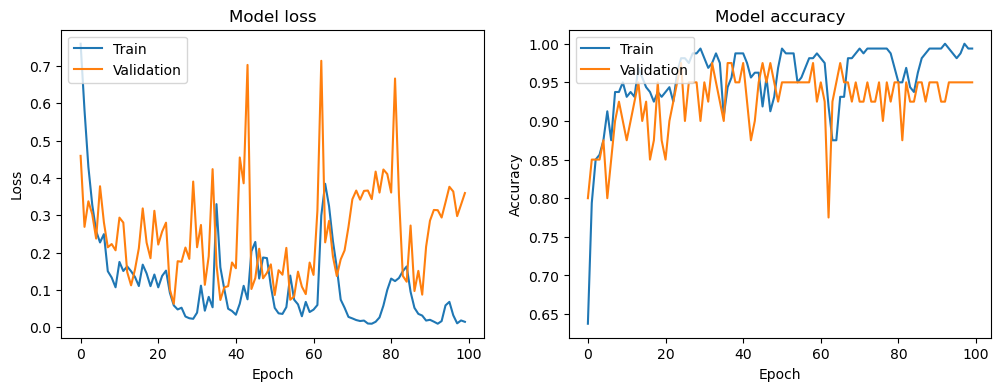

In [106]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Try 8

In [107]:
model = Sequential([
    Input(shape=(3, )),
    Dense(10, activation='sigmoid'),
    Dense(3, activation='softmax'),
])

model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [109]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3969 - loss: 1.5306 - val_accuracy: 0.3500 - val_loss: 1.2586
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3887 - loss: 1.1871 - val_accuracy: 0.4000 - val_loss: 1.0576
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4619 - loss: 0.9803 - val_accuracy: 0.5000 - val_loss: 0.9777
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 0.9729 - val_accuracy: 0.5750 - val_loss: 0.9312
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 0.9147 - val_accuracy: 0.5750 - val_loss: 0.8814
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.8387 - val_accuracy: 0.6000 - val_loss: 0.8325
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.8167 - val_accuracy: 0.6250 - val_loss: 0.7869
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.7726 - val_accuracy: 0.7250 - val_loss: 0.7448


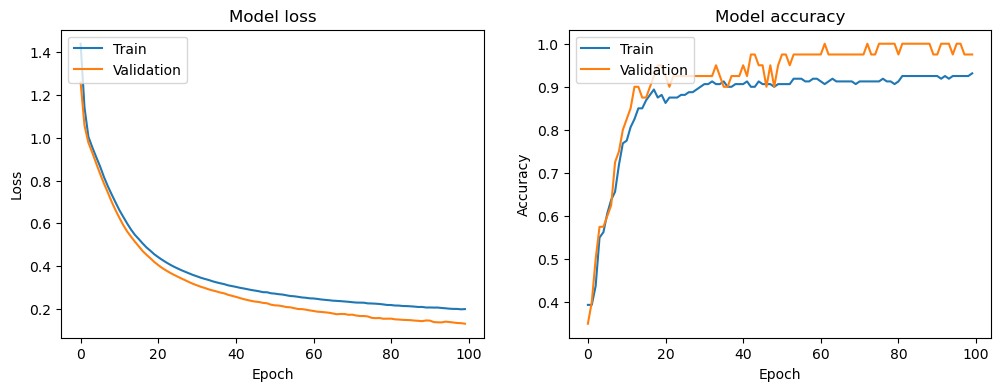

In [110]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Try 9

In [111]:
model = Sequential([
    Input(shape=(3, )),
    Dense(1, activation='tanh'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [114]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [115]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1861 - loss: 1.3365 - val_accuracy: 0.2250 - val_loss: 1.2592
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2219 - loss: 1.2494 - val_accuracy: 0.3000 - val_loss: 1.2155
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.2034 - val_accuracy: 0.2750 - val_loss: 1.1838
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2254 - loss: 1.1921 - val_accuracy: 0.3250 - val_loss: 1.1590
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3288 - loss: 1.1343 - val_accuracy: 0.3750 - val_loss: 1.1421
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3492 - loss: 1.1498 - val_accuracy: 0.3750 - val_loss: 1.1268
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.0930 - val_accuracy: 0.3500 - val_loss: 1.1145
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3429 - loss: 1.0860 - val_accuracy: 0.3500 - val_loss: 1.1023


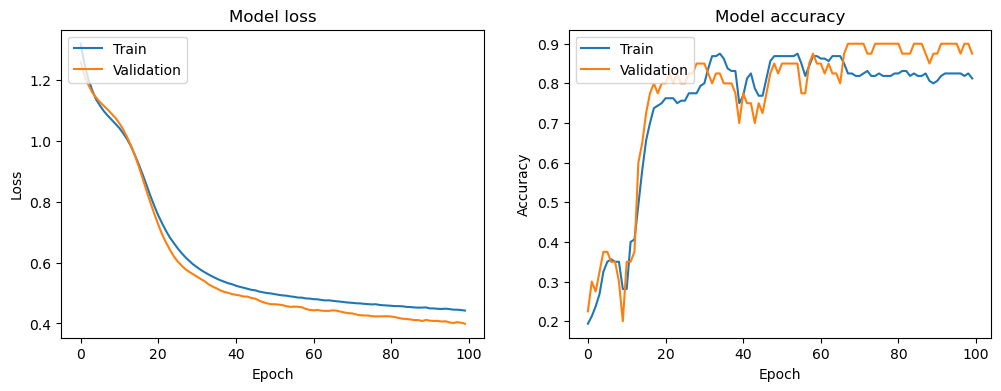

In [116]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()